In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
import warnings
import seaborn as sns
import plotly.offline as py

from scipy import signal
import folium
from folium.plugins import MarkerCluster
import plotly.graph_objs as go
import matplotlib.pyplot as plt


In [19]:
thyroid = pd.read_csv('C:/Users/Vedantika/Desktop/DPSs/DPS/thyroid (3).csv')

In [20]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1
2,80,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,1
3,66,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,1
4,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,1


In [21]:
thyroid.shape

(2645, 22)

In [22]:
thyroid.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,...,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2643.000000,2643.000000,2645.000000
mean,53.066541,0.667675,0.100567,0.009074,0.012476,0.042722,0.015501,0.012476,0.015123,0.055198,...,0.007561,0.021928,0.000378,0.064650,5.032397,2.001149,107.845936,0.995650,109.435906,0.918336
std,20.367819,0.471136,0.300812,0.094841,0.111020,0.202268,0.123557,0.111020,0.122065,0.228410,...,0.086644,0.146477,0.019444,0.245954,23.966136,0.823521,35.450095,0.196445,32.472156,0.273903
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.500000,88.000000,0.870000,93.000000,1.000000
50%,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.300000,2.000000,103.000000,0.980000,107.000000,1.000000
75%,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.600000,2.300000,124.000000,1.090000,124.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.120000,395.000000,1.000000


In [23]:
thyroid=thyroid.drop_duplicates()
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2644
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2644 non-null   int64  
 1   sex                        2644 non-null   int64  
 2   on_thyroxine               2644 non-null   int64  
 3   query_on_thyroxine         2644 non-null   int64  
 4   on_antithyroid_medication  2644 non-null   int64  
 5   sick                       2644 non-null   int64  
 6   pregnant                   2644 non-null   int64  
 7   thyroid_surgery            2644 non-null   int64  
 8   I131_treatment             2644 non-null   int64  
 9   query_hypothyroid          2644 non-null   int64  
 10  query_hyperthyroid         2644 non-null   int64  
 11  lithium                    2644 non-null   int64  
 12  goitre                     2644 non-null   int64  
 13  tumor                      2644 non-null   int64

In [24]:
thyroid['binaryClass'].value_counts()

1    2428
0     216
Name: binaryClass, dtype: int64

P --> Positive for Thyroid

N --> Negative for Thyroid

In [25]:
X = thyroid.drop(columns = 'binaryClass', axis=1)
Y = thyroid['binaryClass']

In [26]:
print(X)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41    1             0                   0                          0   
1      70    1             0                   0                          0   
2      80    1             0                   0                          0   
3      66    1             0                   0                          0   
4      68    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
2640   19    1             0                   0                          0   
2641   68    1             0                   0                          0   
2642   74    1             0                   0                          0   
2643   72    0             0                   0                          0   
2644   64    1             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatme

In [27]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2640    0
2641    1
2642    1
2643    1
2644    1
Name: binaryClass, Length: 2644, dtype: int64


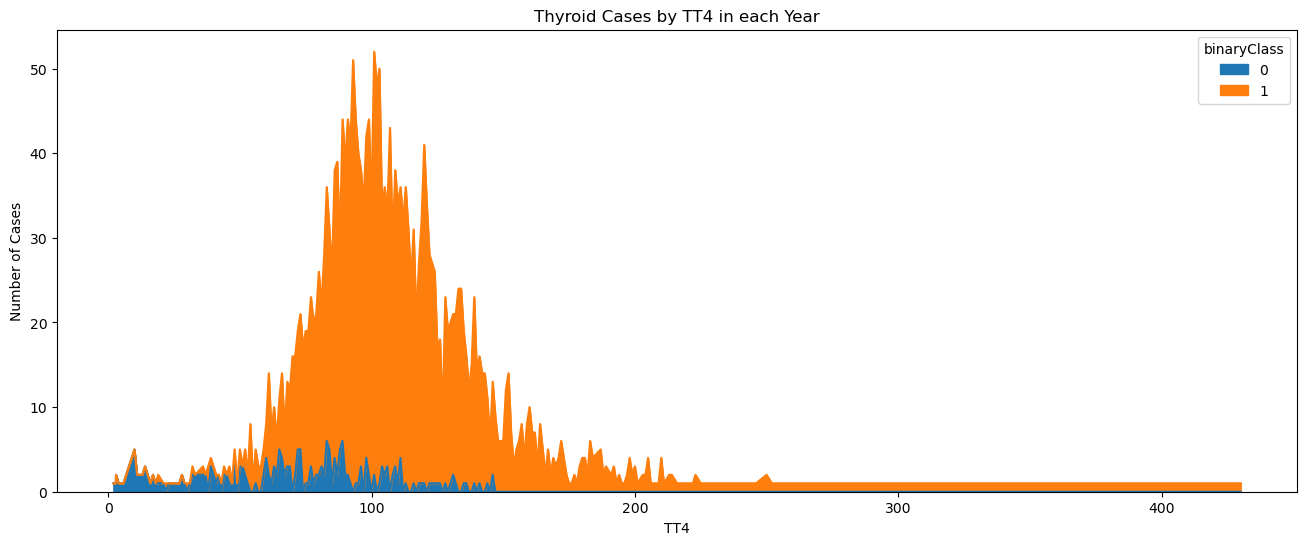

In [28]:
pd.crosstab(thyroid.TT4, thyroid.binaryClass).plot(kind='area',figsize=(16,6))
plt.title('Thyroid Cases by TT4 in each Year')
plt.ylabel('Number of Cases')
plt.show()

In [29]:
T3Data = thyroid.loc[:,'T3']
TT4Data = thyroid.loc[:,'TT4']


In [30]:
T3TT4Data = pd.concat([T3Data, TT4Data], axis=1)
T3TT4FormatData =T3TT4Data.pivot_table(columns='T3', values='TT4', aggfunc='sum')
T3TT4FormatData

T3,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,...,5.70,6.00,6.20,6.70,7.00,7.10,7.30,7.60,8.50,10.60
TT4,144.0,115.0,755.8,1020.0,790.8,829.9,1410.0,2165.0,3349.0,3196.0,...,372.0,250.0,255.0,230.0,141.0,407.0,430.0,120.0,244.0,226.0


Text(0.5, 1.0, 'Total Number of people affected')

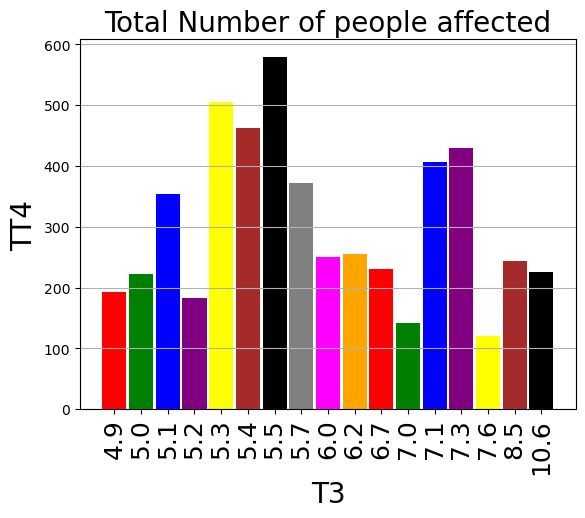

In [31]:
labels = T3TT4FormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = T3TT4FormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=5
fig_size[1]=10
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('TT4', fontsize=20)
plt.xlabel('T3', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Total Number of people affected', fontsize = 20)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2644, 21) (2115, 21) (529, 21)


In [34]:
classifier = svm.SVC(kernel='linear')

In [35]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [36]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9659574468085106


In [38]:
X_test = np.nan_to_num(X_test)
Y_test = np.nan_to_num(Y_test)

In [39]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

c:\Users\Vedantika\anaconda3\envs\Dps\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [40]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9640831758034026


In [41]:
input_data = (66,	1, 0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0.6,	2.2,	123,	0.93,	132)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have thyroid')
else:
  print('The person has thyroid')

[1]
The person has thyroid


c:\Users\Vedantika\anaconda3\envs\Dps\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [42]:
import pickle

In [43]:
filename = 'thyroid_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open('thyroid_model.sav', 'rb'))

In [45]:
input_data = (66,	1, 0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0.6,	2.2,	123,	0.93,	132)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
   print('The person does not have thyroid')
else:
  print('The person has thyroid')

[1]
The person has thyroid


c:\Users\Vedantika\anaconda3\envs\Dps\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [46]:
for column in X.columns:
  print(column)

age
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH
T3
TT4
T4U
FTI
